Exercise 4.1

Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

quadratic (second degree polynomial)
logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import train_test_split
%matplotlib inline

/Users/rebeccahyde/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
x = np.random.uniform(1, 100, 1000)
y = 1 + 3*np.log(x) + np.random.normal()

In [3]:
df = pd.DataFrame({'x':x,'y':y})

In [4]:
df['x^2'] = np.square(df['x'])
df['logx'] = np.log(df['x'])

In [5]:
df1 = df[['x', 'x^2']]

In [6]:
df2 = df[['logx']]

In [7]:
model = smf.OLS(y, df1)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 2.049e+04
Date:                Thu, 13 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:21:45   Log-Likelihood:                -2077.6
No. Observations:                1000   AIC:                             4159.
Df Residuals:                     998   BIC:                             4169.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x              0.4423      0.004    105.650      0.000         0.434     0.451
x^2           -0.0032   5.45e-05    -58.514      0.000        -0.003    -0.003
==============================================================================
Omnibus:                      297.512   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.412
Skew:                           0.559   Prob(JB):                     1.16e-21
Kurtosis:                       1.969   Cond. No.                         304.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
model = smf.OLS(y, df2)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.956e+06
Date:                Thu, 13 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:21:45   Log-Likelihood:                -157.23
No. Observations:                1000   AIC:                             316.5
Df Residuals:                     999   BIC:                             321.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
logx           3.3263      0.002   1398.457      0.000         3.322     3.331
==============================================================================
Omnibus:                      243.071   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.860
Skew:                           1.407   Prob(JB):                    1.41e-105
Kurtosis:                       4.917   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Exercise 4.2

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

In [152]:
#x = np.random.uniform(1, 100, 1000)
x = np.linspace(0, 10, num=1000)
y = 1 + 3*(x) + 6*(x**2) + np.random.normal(scale=100.0, size=1000)

In [153]:
df = pd.DataFrame({'x':x, 'x^2':x**2, 'y':y})

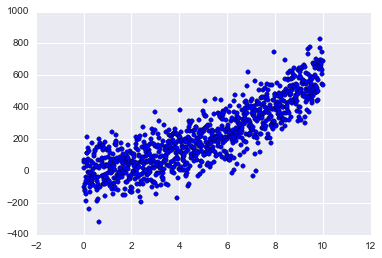

In [154]:
plt.scatter(x, y)

In [155]:
X=df[['x','x^2']]

In [12]:
model = smf.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.259e+11
Date:                Thu, 13 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:21:45   Log-Likelihood:                -1132.9
No. Observations:                1000   AIC:                             2270.
Df Residuals:                     998   BIC:                             2280.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x              3.0982      0.002   1903.173      0.000         3.095     3.101
x^2            5.9992   2.14e-05   2.81e+05      0.000         5.999     5.999
==============================================================================
Omnibus:                      161.611   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.907
Skew:                           1.179   Prob(JB):                     1.79e-53
Kurtosis:                       3.518   Cond. No.                         302.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
lr=LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.78394186937181265

In [157]:
y_train_pred = lr.predict(X_train)
mean_squared_error(y_train, y_train_pred)

10196.153808864163

In [158]:
y_test_pred = lr.predict(X_test)
mean_squared_error(y_test, y_test_pred)

9276.4529184767816

Exercise 4.3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error  
test error  
R squared  

In [159]:
from sklearn.pipeline import make_pipeline
train_error = np.empty(8)
test_error = np.empty(8)
r2 = np.empty(8)
x=x.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
for i in range (0, 8):  
    est = make_pipeline(PolynomialFeatures(i), LinearRegression())
    est.fit(X_train, y_train)
    train_error[i] = mean_squared_error(y_train, est.predict(X_train))
    test_error[i] = mean_squared_error(y_test, est.predict(X_test))
    r2[i]= est.score(X_test, y_test) 

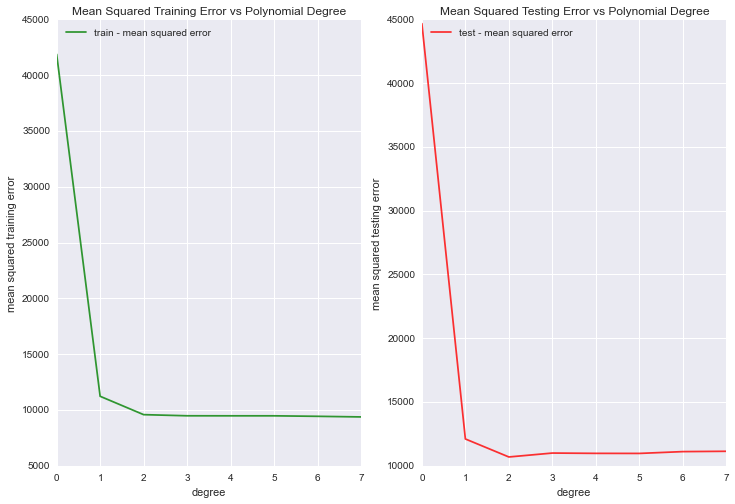

In [160]:
f, ax = plt.subplots(1,2, figsize = (12,8))

ax[0].plot(np.arange(8), train_error, color='green', label='train - mean squared error',alpha = 0.8)
ax[0].set_ylabel('mean squared training error')
ax[0].set_xlabel('degree')
ax[0].legend(loc='upper left')
ax[0].set_title('Mean Squared Training Error vs Polynomial Degree')



ax[1].plot(np.arange(8), test_error, color='red', label='test - mean squared error', alpha = 0.8)
ax[1].set_ylabel('mean squared testing error')
ax[1].set_xlabel('degree')
ax[1].legend(loc='upper left')
ax[1].set_title('Mean Squared Testing Error vs Polynomial Degree')



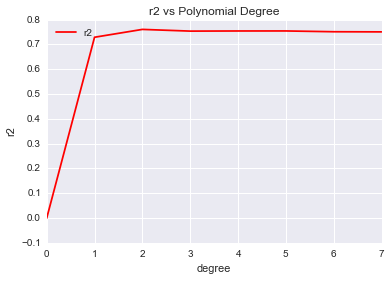

In [161]:

plt.plot(np.arange(8), r2, color='red', label='r2')
plt.ylabel('r2')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.title('r2 vs Polynomial Degree')

Exercise 4.4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [179]:
train_error = []
test_error = []
m = list(range(5, 1001, 5))
x=x.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
for i,v in enumerate(m):
    est.fit(X_train[:v], y_train[:v])
    train_error.append(mean_squared_error(y_train[:v], est.predict(X_train[:v])))
    test_error.append(mean_squared_error(y_test, est.predict(X_test)))

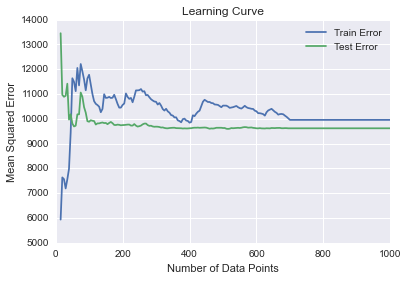

In [180]:
plt.plot(m[2:], train_error[2:])
plt.plot(m[2:], test_error[2:])
plt.legend(['Train Error', 'Test Error'])
plt.xlabel('Number of Data Points')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve');